In [ ]:
pip install covid

In [7]:
#Import required packages
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import matplotlib as mpl
import pandas as pd
import numpy as np


In [ ]:
# Importing the necessay module
from covid import Covid
from datetime import datetime as dt
# Defining covidUpdatesWorldwide( ) to get the latest information of Covid Cases
def covidUpdatesWorldwide( ):

    # Fetch number of active, confirmed cases & total number of recovered & deaths
    worldwide_total_active_cases = Covid().get_total_active_cases()
    worldwide_total_confirmed_cases = Covid().get_total_confirmed_cases()
    worldwide_total_recovered = Covid().get_total_recovered()
    worldwide_total_deaths = Covid().get_total_deaths()

    # Printing the results
    print("\nWORLDWIDE COVID INFORMATION\n")
    print( "TOTAL ACTIVE :        " + str(worldwide_total_active_cases))
    print( "TOTAL CONFIRMED :     " + str(worldwide_total_confirmed_cases))
    print( "TOTAL RECOVERED :     " + str(worldwide_total_recovered))
    print( "TOTAL DEATHS :        " + str(worldwide_total_deaths))

# Defining covidUpdatesSpecificCountry( ) with country as argument to get c
def covidUpdatesSpecificCountry( i_country ):
# Fetching the covid information of the user-input country
    specific_country_covid_info = Covid().get_status_by_country_name(i_country)

    country_total_active_cases = specific_country_covid_info['active']
    country_total_confirmed_cases = specific_country_covid_info['confirmed']
    country_total_recovered = specific_country_covid_info['recovered']
    country_total_deaths = specific_country_covid_info['deaths']
    updated_time_epoch = specific_country_covid_info['last_update']
    data_updated_at = dt.fromtimestamp(updated_time_epoch/1000)

    # Printing the results
    print("\n" + i_country  + " COVID INFORMATION\n" )
    print("TOTAL ACTIVE :        " + str(country_total_active_cases))
    print( "TOTAL CONFIRMED:     "+ str(country_total_confirmed_cases))
    print( "TOTAL RECOVERED :    "+ str(country_total_recovered))
    print( "TOTAL DEATHS :       " + str(country_total_deaths))
    print( "LAST UPDATED AT:     "+ str(data_updated_at))

# Driver Code
if __name__ == '__main__':
    covidUpdatesWorldwide()
    country = input("\n\nENTER THE COUNTRY'S NAME : ")
    covidUpdatesSpecificCountry(country)




WORLDWIDE COVID INFORMATION

TOTAL ACTIVE :        9721348
TOTAL CONFIRMED :     35567574
TOTAL RECOVERED :     24800401
TOTAL DEATHS :        1045563


ENTER THE COUNTRY'S NAME : INDIA

INDIA COVID INFORMATION

TOTAL ACTIVE :        919023
TOTAL CONFIRMED:     6685082
TOTAL RECOVERED :    5662490
TOTAL DEATHS :       103569
LAST UPDATED AT:     2020-10-06 16:23:44


# Load global data from JHU repository

In [5]:

# Filenames of JHU data
filename_confirmed = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv'
filename_active = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_active_global.csv'

In [6]:
data_confirmed = pd.read_csv(filename_confirmed)
data_active = pd.read_csv(filename_active)

NameError: ignored

In [ ]:
# Confirmed cases

# Load all country names into a list
countries = []
for i in data_confirmed['Country/Region']:
    if i not in countries:
        countries.append(i)

# List of country names to highlight in the plot
highlighted_countries = ['US', 'China','India','Brazil','Russia','Colombia']

## Function covidData to extract data for specific countries

In [ ]:
def covidData(country, output=1, start=100):
    
    data_conf = data_confirmed[data_confirmed['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_rec = data_recovered[data_recovered['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    data_dea = data_deaths[data_deaths['Country/Region'] == country].loc[:, '1/22/20':].sum(axis=0)
    
    # Find first non-zero index to get day 0 (first confirmed case)
    day0 = -1
    for i in range(len(data_conf)):
        if output == 1 or output == 4:
            if data_conf[i] >= start:
                day0 = i
                break
        elif output == 2:
            if data_rec[i] >= start:
                day0 = i
                break
        else:
            if data_dea[i] >= start:
                day0 = i
                break
    if day0 == -1:
        return []
    
    # If output is 1 (confirmed), return aggregate confirmed cases
    if output == 1:
        return data_conf[day0:]
    
    # If output is 2 (recovered), return aggregate recovered cases
    if output == 2:
        return data_rec[day0:]
    
    # If output is 3 (deaths), return aggregate deaths
    if output == 3:
        return data_dea[day0:]
    # If output is 4 (net), return the net number of cases
    if output == 4:
        data_output = (data_conf.subtract(data_rec)).subtract(data_dea)
        return data_output[day0:]

In [ ]:
# Font properties
mpl.rcParams['font.size'] = 24

# Axes properties
mpl.rcParams['axes.linewidth'] = 0
mpl.rcParams['axes.facecolor'] = '#ededed'
mpl.rcParams['axes.labelpad'] = 10

# Tick properties
mpl.rcParams['xtick.major.pad'] = 5
mpl.rcParams['xtick.major.size'] = 0
mpl.rcParams['xtick.minor.size'] = 0
mpl.rcParams['ytick.major.pad'] = 5
mpl.rcParams['ytick.major.size'] = 0
mpl.rcParams['ytick.minor.size'] = 0

# Line properties
mpl.rcParams['lines.solid_capstyle'] = 'round'

# Plot confirmed cases – starting at 1000th case



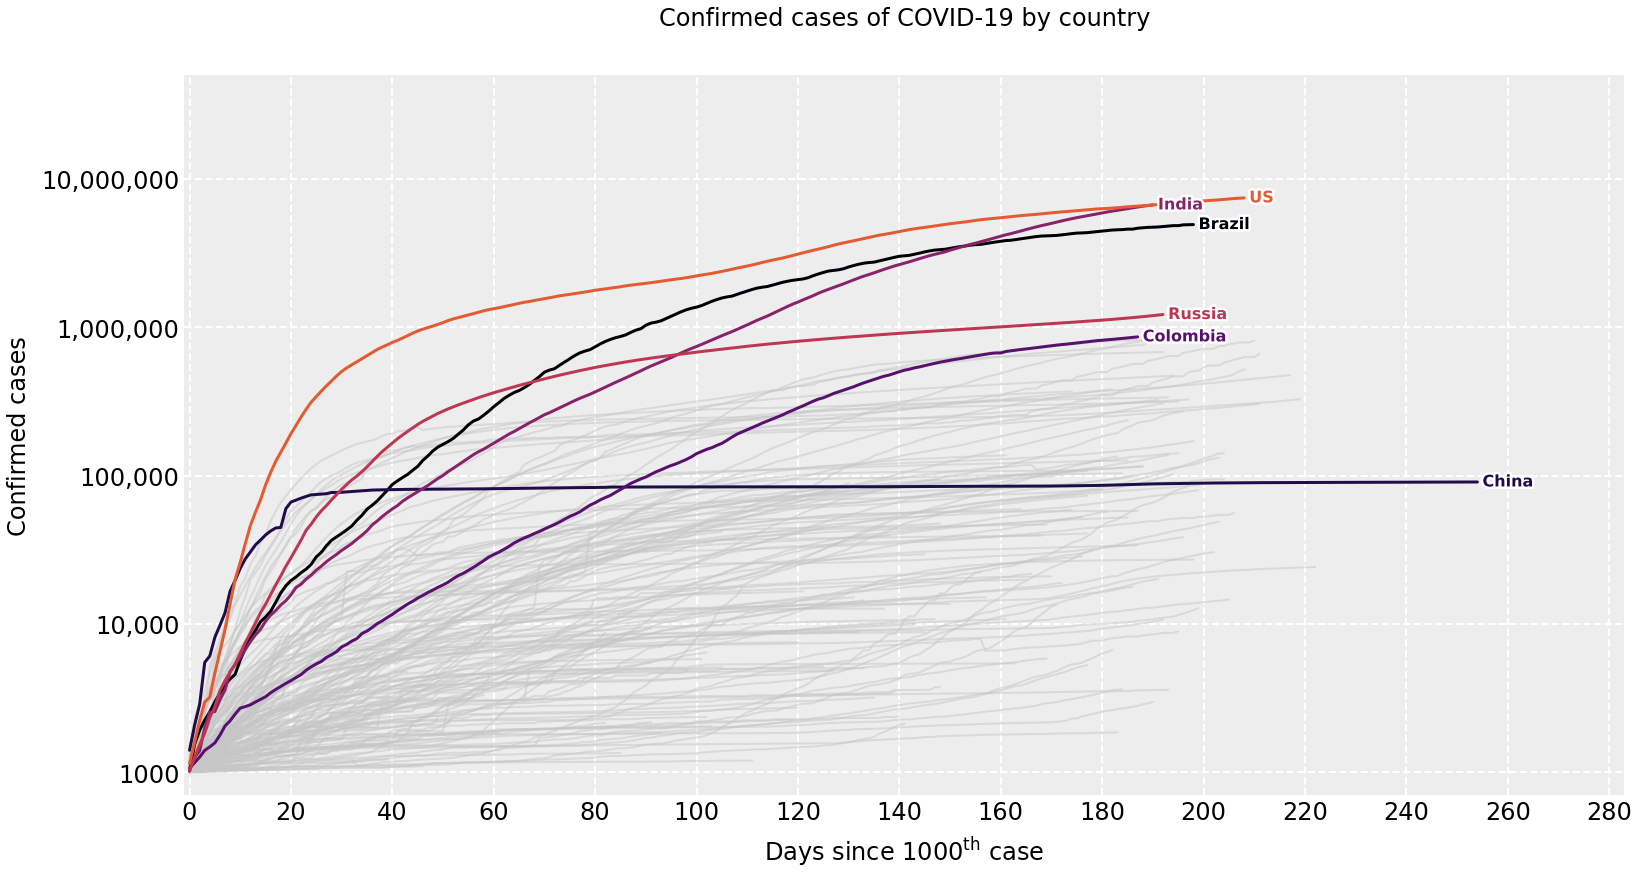

In [ ]:
# Plot of confirmed cases

# Generate list of colors from 'inferno' colormap for highlighted countries and a color for the background countries
colors = cm.get_cmap('inferno', int(1.5*len(highlighted_countries)))
color_bg = '#c6c6c6'

# Create figure and axes
fig = plt.figure(figsize=(20,10), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Add grid for readability of logarithmic axes
ax.grid(color='white', linewidth=2, linestyle='--', zorder=1)

# Range of plot (x-axis and y-axis)
x_max = 280 # Days
y_max = 5*10**7 # Cases

# Padding for text labels
left_pad = 0

# Remove increase section since most curves have flattened
# Lines for exponential increase (edit rate as desired)
rate = [] # percent change per day (list of values for plot)
for i in rate:
    increase_line = [1000]
    total_cases = 1000
    
    while len(increase_line) < x_max and total_cases < y_max:
        total_cases *= (1 + i/100.0)
        increase_line.append(total_cases)

    ax.plot(np.arange(0, len(increase_line), 1), increase_line, linewidth=2, linestyle='--', color='black', alpha=0.3, zorder=2)
    increase_label = ax.text(len(increase_line) - 0.5, increase_line[-1], str(i) + '% Daily', size=20, color='black', ha='left', va='center', alpha=0.3)

# Colors for highlighted countries
colorCounter = 0

# Whether to show non-highlighted countries in the background
showBackground = True

# Plot confirmed cases for different countries (if showBackground is True the plot non-highlighted countries in semitransparent gray)
for i in countries:
    data = covidData(i, 1, 1000)
    if i in highlighted_countries and len(data) > 0:
        ax.plot(np.arange(0, len(data), 1), data, linewidth=3, color=colors(colorCounter), zorder=3)
        text = ax.text(len(data) + left_pad, data[-1], i, size=16, weight='bold', ha='left', va='center', color=colors(colorCounter))
        text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
        colorCounter += 1
    elif len(data) > 0 and showBackground:
        ax.plot(np.arange(0, len(data), 1), data, linewidth=2, color=color_bg, alpha=0.5, zorder=2)
# Set x-axis tick intervals
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))

# Set y-axis tick intervals and labels
ax.set_yticks([1000,10000, 100000, 1000000,10000000])
ax.set_yticklabels(['1000','10,000', '100,000', '1,000,000', '10,000,000'])

# Set x and y-axis labels
ax.set_xlabel(u'Days since 1000$\mathregular{^{th}}$ case')
ax.set_ylabel('Confirmed cases')

# Set axis limits
ax.set_xlim(-1, x_max + 3)
ax.set_ylim(700, y_max)

# Title
ax.set_title('Confirmed cases of COVID-19 by country', size=24, pad=50)

# Save plot (comment/uncomment as desired)
dpi = 500 # Resolution of image
plt.savefig('covid-cases.png', dpi=dpi, bbox_inches='tight')

# Show plot
plt.show()


# Plot active cases – starting at 100th case

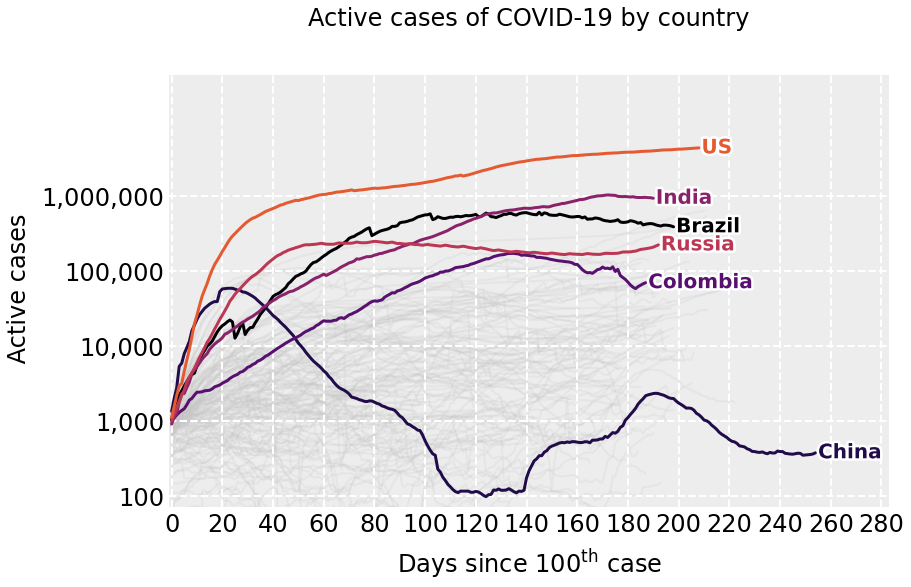

In [ ]:
  # Plot of open cases

# Generate list of colors from 'inferno' colormap for highlighted countries and a color for the background countries
colors = cm.get_cmap('inferno', int(1.5*len(highlighted_countries)))
color_bg = '#c6c6c6'

# Create figure and axes
fig = plt.figure(figsize=(10,6), facecolor='white')
ax = fig.add_axes([0, 0, 1, 1])

# Set y-axis scale to logarithmic
ax.set_yscale('log')

# Add grid for readability of logarithmic axes
ax.grid(color='white', linewidth=2, linestyle='--')

# Range of plot (x-axis and y-axis)
x_max = 280 # Days
y_max = 4*10**7 # Cases

# Padding for text labels
left_pad = 0

# Lines for exponential increase (edit rate as desired)
rate = [] # percent change per day (list of values for plot)

for i in rate:
    increase_line = [100]
    total_cases = 100
    while len(increase_line) <= x_max and total_cases < y_max:
        total_cases *= (1 + i/100.0)
        increase_line.append(total_cases)

    ax.plot(np.arange(0, len(increase_line), 1), increase_line, linewidth=2, linestyle='--', color='black', alpha=0.3)
    increase_label = ax.text(len(increase_line) - 0.5, increase_line[-1], str(i) + '% Daily', size=16, color='black', ha='left', va='center', alpha=0.3)

# Colors for highlighted countries
colorCounter = 0

# Whether to show non-highlighted countries in the background
showBackground = True

# Plot confirmed cases for different countries (if showBackground is True the plot non-highlighted countries in semitransparent gray)
for i in countries:
    data = covidData(i, 4, 1000)
    if i in highlighted_countries and len(data) > 0:
        ax.plot(np.arange(0, len(data), 1), data, linewidth=3, color=colors(colorCounter), zorder=2)
        text = ax.text(len(data) + left_pad, data[-1], i, size=20, weight='bold', ha='left', va='center', color=colors(colorCounter))
        text.set_path_effects([pe.Stroke(linewidth=5, foreground='w'), pe.Normal()])
        colorCounter += 1
    elif len(data) > 0 and showBackground:
        ax.plot(np.arange(0, len(data), 1), data, linewidth=2, color=color_bg, alpha=0.2, zorder=1)

# Set x-axis tick intervals
ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(20))
ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(10))
# Set y-axis tick intervals and labels
ax.set_yticks([100, 1000, 10000, 100000, 1000000])
ax.set_yticklabels(['100', '1,000', '10,000', '100,000', '1,000,000'])

# Set x and y-axis labels
ax.set_xlabel(u'Days since 100$\mathregular{^{th}}$ case', labelpad=10)
ax.set_ylabel(' Active cases', labelpad=10)

# Set axis limits
ax.set_xlim(-1, x_max + 3)
ax.set_ylim(70, y_max)

# Title
ax.set_title('Active cases of COVID-19 by country', size=24, pad=50)

# Save plot (comment/uncomment as desired)
dpi = 500 # Resolution of image
plt.savefig('covid-net-cases.png', dpi=dpi, bbox_inches='tight')

# Show plot
plt.show()